In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from scipy.io import wavfile
from scipy import linalg as LA
samplingRate, signal1 = wavfile.read('C:\\Users\\muskan\\Desktop\\ida-master\\mix1.wav')
print ("Sampling rate = ", samplingRate)
print ("Data type is ", signal1.dtype)
mean1=np.mean(signal1)
signal1=signal1-mean1
max1=np.max(signal1)
signal1=signal1/max1
a = signal1.shape
n = a[0]
print ("Number of samples: ", n)
n = n * 1.0
samplingRate, signal2 = wavfile.read('C:\\Users\\muskan\\Desktop\\ida-master\\mix2.wav')
mean2=np.mean(signal2)
signal2=signal2-mean2
max2=np.max(signal2)
signal2=signal2/max2
x=[signal1, signal2]



Sampling rate =  8000
Data type is  uint8
Number of samples:  50000


Text(0.5, 1.0, 'Whitened data')

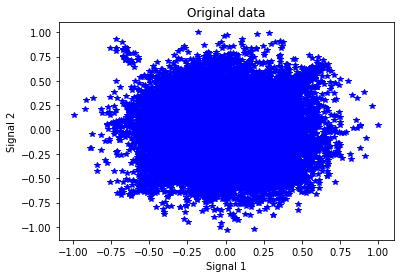

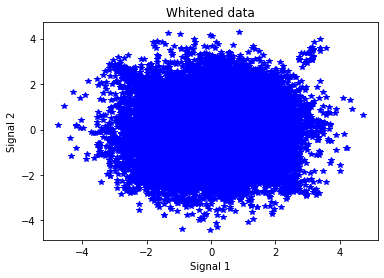

In [2]:
plt.figure()
plt.plot(x[0], x[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Original data")
cov = np.cov(x)
# Calculate eigenvalues and eigenvectors of the covariance matrix.
d, E = LA.eigh(cov)
# Generate a diagonal matrix with the eigenvalues as diagonal elements.
D = np.diag(d)

Di = LA.sqrtm(LA.inv(D))
# Perform whitening. xn is the whitened matrix.
xn = np.dot(Di, np.dot(np.transpose(E), x))

# Plot whitened data to show new structure of the data.
plt.figure()
plt.plot(xn[0], xn[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Whitened data")

Text(0.5, 1.0, 'Generated signal 2')

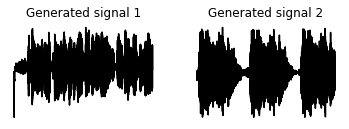

In [3]:
norm_xn = LA.norm(xn, axis=0)
norm = [norm_xn, norm_xn]

cov2 = np.cov(np.multiply(norm, xn))

d_n, Y = LA.eigh(cov2)

source = np.dot(np.transpose(Y), xn)

# Plot the separated sources.
time = np.arange(0, n, 1)
time = time / samplingRate
time = time * 1000  # convert to milliseconds

plt.figure()
plt.subplot(2, 2, 1).set_axis_off()
plt.plot(time, source[0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 1")

plt.subplot(2, 2, 2).set_axis_off()
plt.plot(time, source[1], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 2")

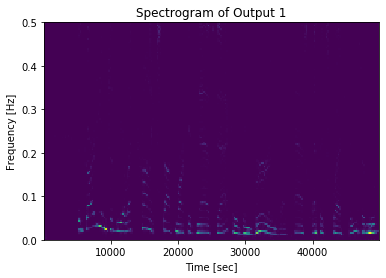

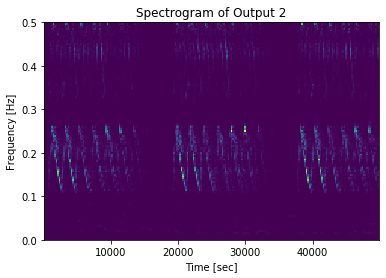

In [4]:
plt.figure()
f, t, S = signal.spectrogram(source[0])
plt.pcolormesh(t, f, S)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Output 1')

plt.figure()
f, t, S = signal.spectrogram(source[1])
plt.pcolormesh(t, f, S)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Output 2')

# Storing numpy array as audio
wavfile.write('C:\\Users\\muskan\\Desktop\\ida-master\\FOBIout1.wav', samplingRate, np.transpose(source[0]))
wavfile.write('C:\\Users\\muskan\\Desktop\\ida-master\\FOBIout2.wav', samplingRate, np.transpose(source[1]))